##### Algerian Forest Fire Dataset

In [3]:
# Importing the required modules and libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [4]:
# Let us now read the dataset
sub_dataset1 = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=1, nrows=122)
# the header parameter tells pandas which row to use as the column names (so we use the first row { index starts from 0 })
# nrows = k -> Pandas will stop reading after k rows.

sub_dataset1.head()

sub_dataset2 = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', skiprows=126)
# skiprows = n -> tells pandas to ignore the first 'n' rows entirely
# Now from the dataset obtained after skipping, consider the 0th row as the header

sub_dataset2.head()

dataset = pd.concat([sub_dataset1, sub_dataset2]).reset_index(drop=True)
dataset.head()

print(dataset.shape)

dataset.to_csv('merged-dataset.csv')

(244, 14)


In [5]:
# Lets gather some basic information
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(1)
memory usage: 26.8+ KB
None


In [6]:
# Now some statistical data about the dataset
print(dataset.describe())

              day       month    year  Temperature          RH          Ws  \
count  244.000000  244.000000   244.0   244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0    32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0     3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

            Rain         FFMC         DMC          DC         ISI         BUI  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288115    4.759836   16.673361   
std      1.999406   14.337571   12.368039   47.619662 

In [7]:
# Let us fix the trailing whitespaces issues in the classes section
def fixWhiteSpaces(string: str):
    return string.strip().lower()

dataset['Classes'] = dataset['Classes'].apply(fixWhiteSpaces)

In [8]:
# Let us now clean the dataset (Dataset Cleaning)
print(dataset.isnull().sum()) # It shows 0 for all columns, hence we can safely proceed to the next steps

dataset['Region'] = np.where(
    dataset.index < 122, # Condition: check if the row index is less than 122
    0, # If True (index < 122), assign 0
    1  # If False (index >= 122), assign 1
).astype(int)
dataset.tail()

dataset.to_csv('merged-dataset.csv')
print(dataset.info())

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes  

In [9]:
# Now, we can notice something strange in columns
dataset.columns # In few columns, there are trailing whitespaces which are unnecessary

def trimCols(string: str):
    return string.strip()

# Or, we can also do (more commonly used): dataset.columns = dataset.columns.str.strip()

dataset.columns = [trimCols(col) for col in dataset.columns] # This will do the trimming (stripping)
dataset.to_csv('merged-dataset.csv', index=False) # index=False, so that we do not store the indices in the csv file

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB
None


In [10]:
dataset = pd.read_csv('merged-dataset.csv')
dataset # This is our cleaned dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [11]:
# Now this day, month and year are of no particular use to us in this problem. So, we can safely drop them
dataset = dataset.drop(columns=['day', 'month', 'year'], axis = 1).reset_index(drop = True)
dataset.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [12]:
# Now, we have one categorical feature called 'Classes'. We need to encode it so that our model can interpret this
dataset['Classes'] = np.where(dataset['Classes'].str.lower() == 'fire', 1, 0)
dataset.tail()
print(dataset['Classes'].value_counts())

Classes
1    138
0    106
Name: count, dtype: int64


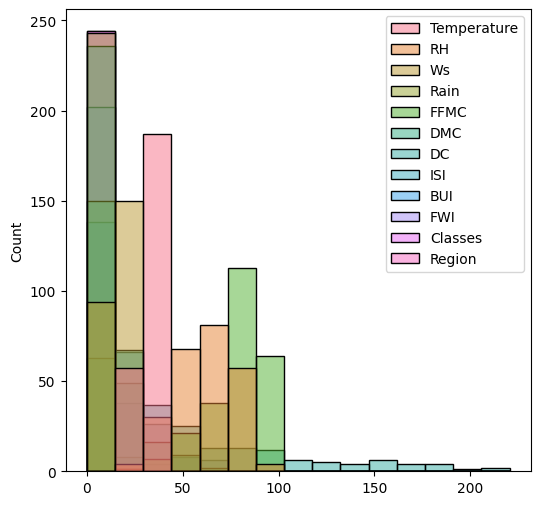

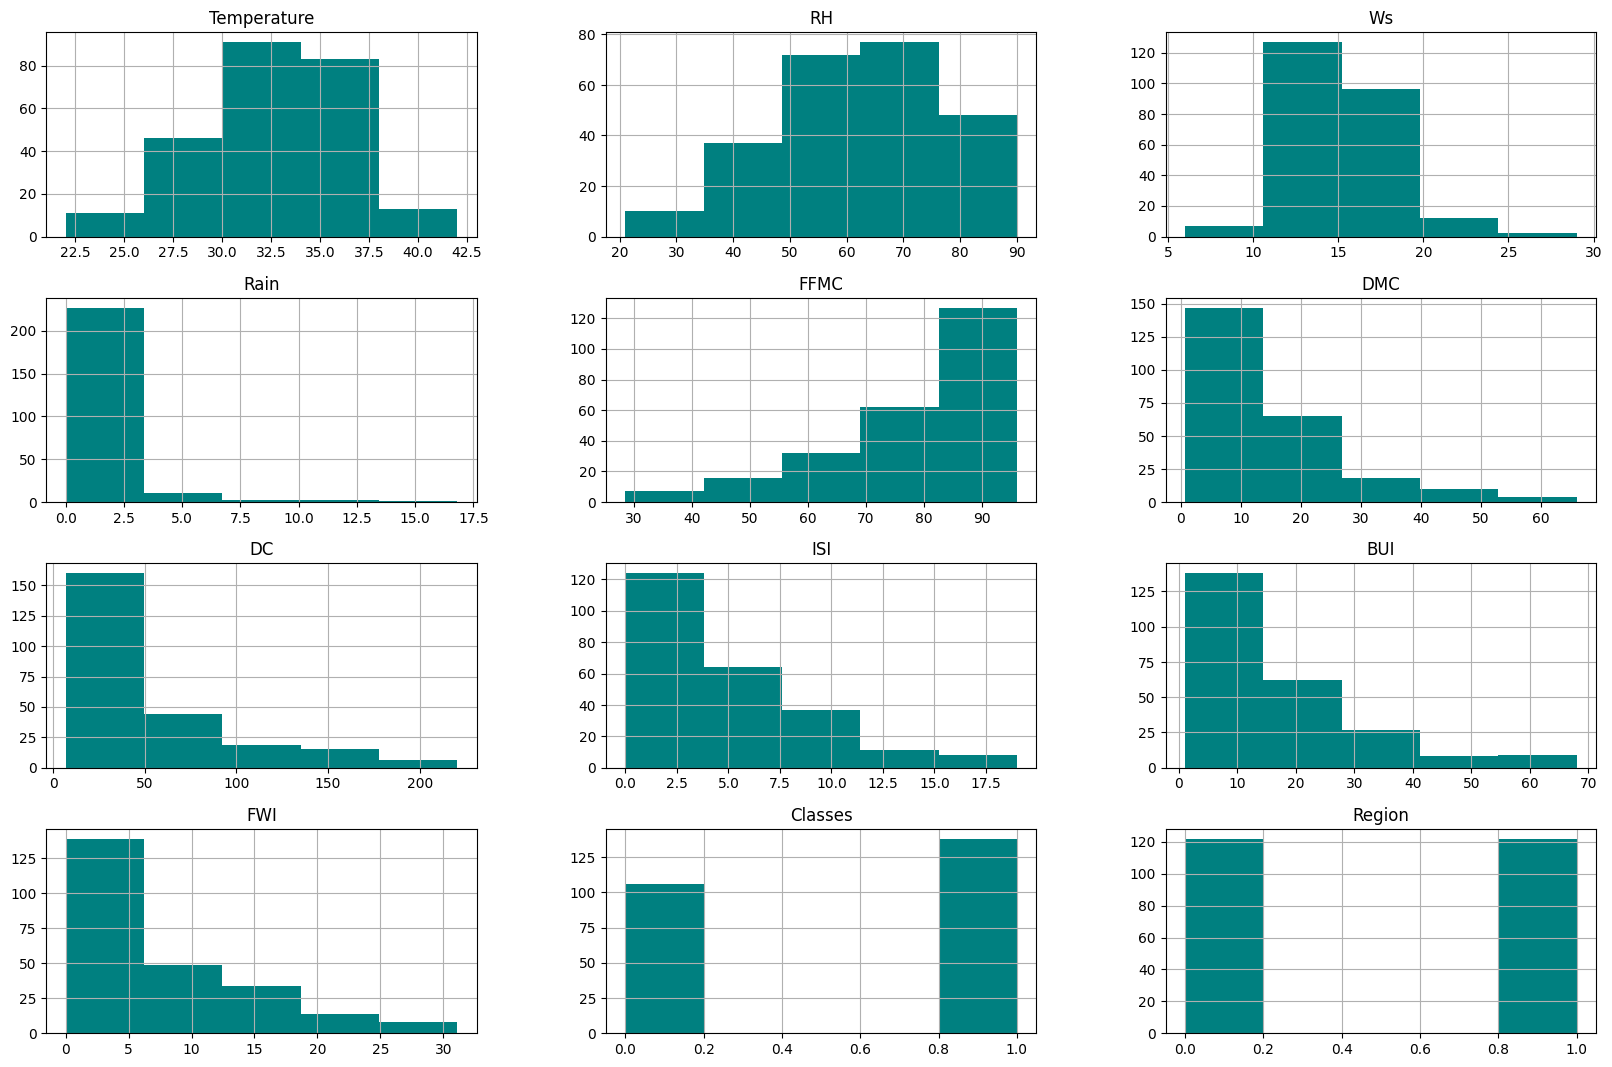

In [13]:
# Let us do some kind of visualizations
plt.figure(figsize = (6,6))
sns.histplot(data=dataset, bins=15)
dataset.hist(bins=5, figsize=(20,13), color = 'teal')
plt.show()

<Figure size 4000x4000 with 0 Axes>

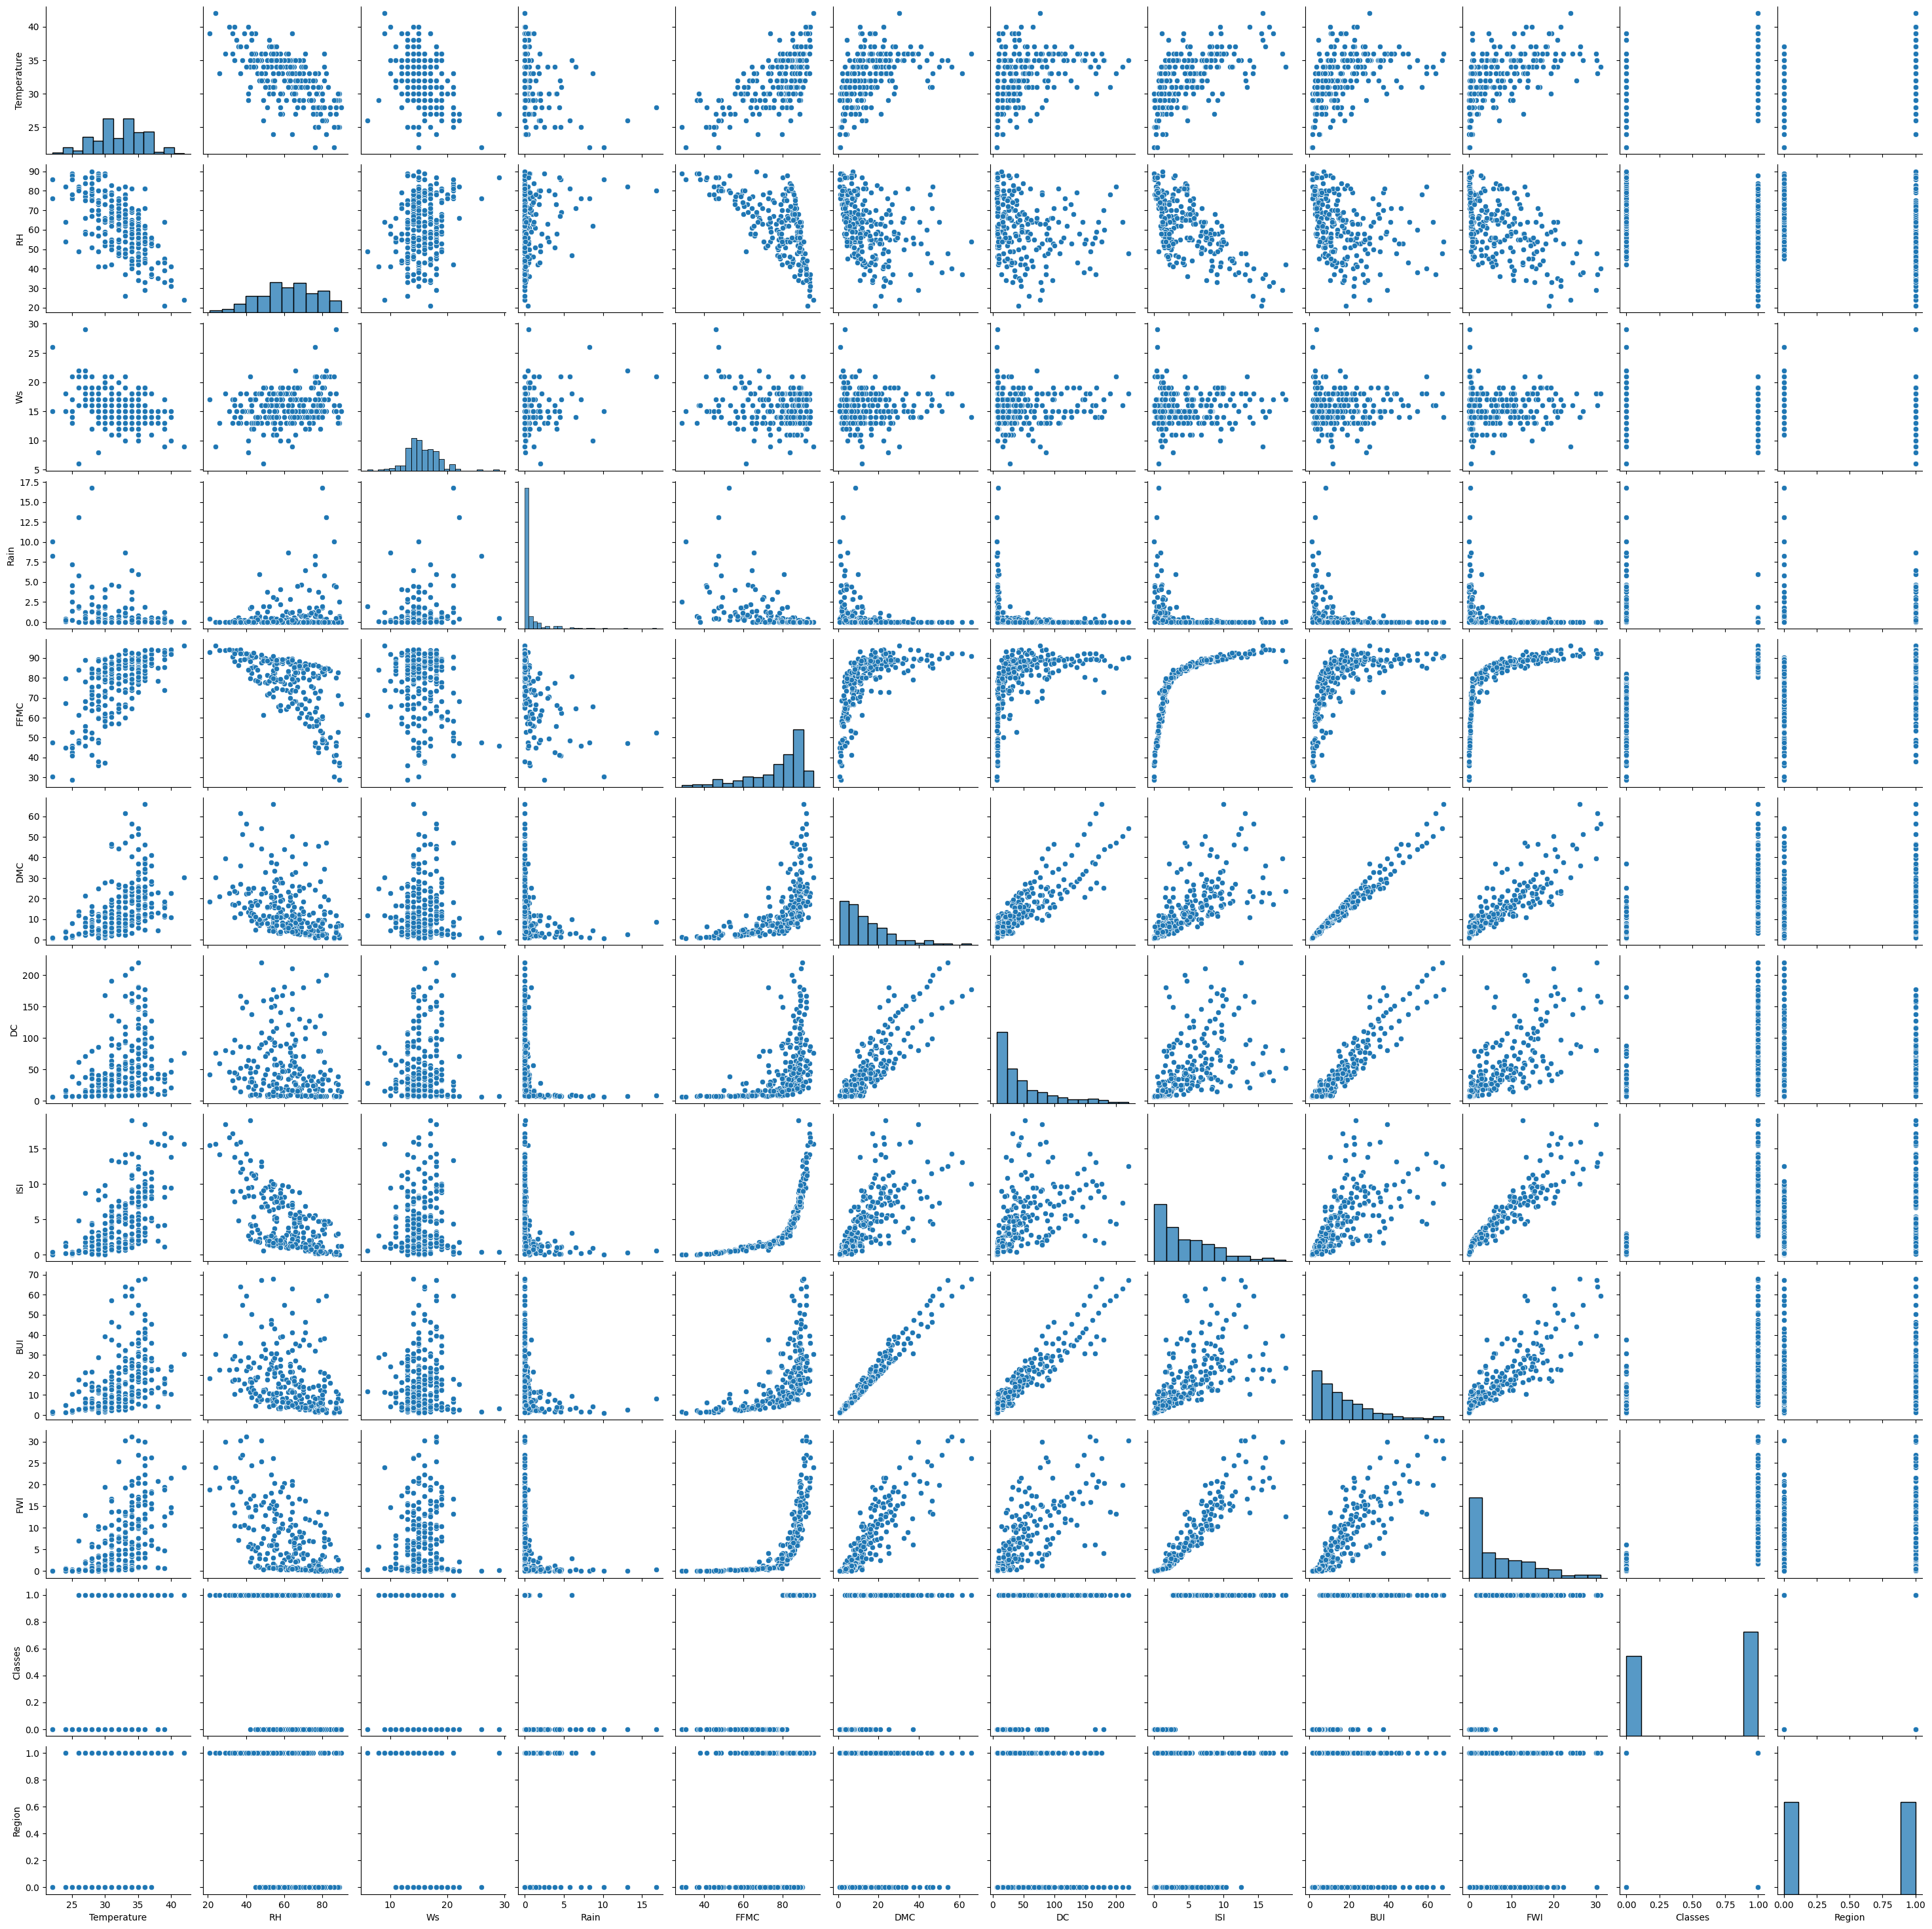

In [14]:
# If we want to see the curve between each two pair of independent/input features, we may also visualize it
plt.figure(figsize=(40,40))
sns.pairplot(data = dataset)

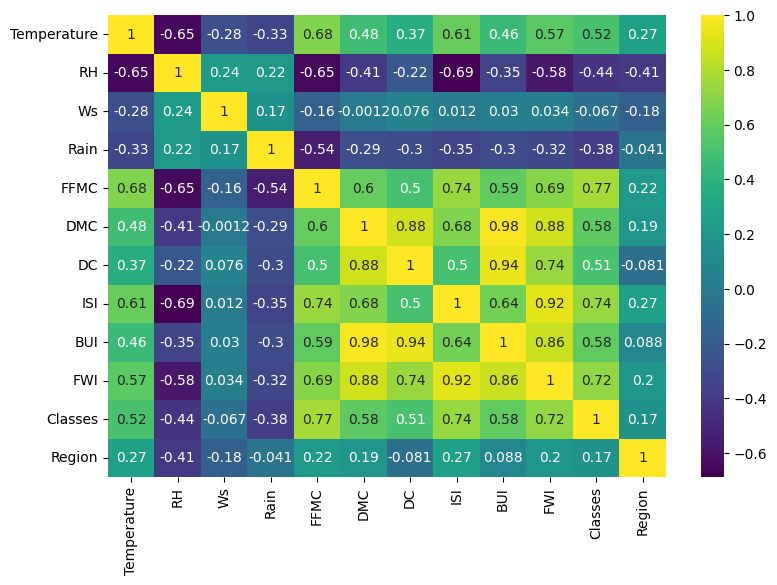

In [15]:
# If we want to visualize the correlation among the non-categorical attributes, we may use
plt.figure(figsize=(9,6))
sns.heatmap(data = dataset.corr(), cmap = 'viridis', annot = True)
plt.show()

Classes
1    56.557377
0    43.442623
Name: proportion, dtype: float64


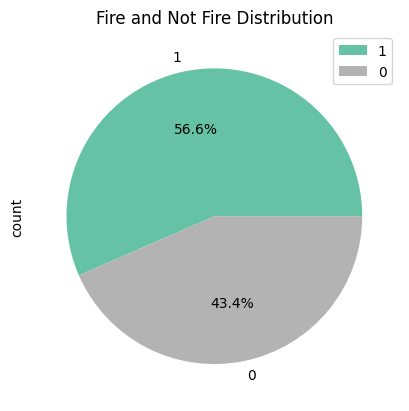

In [16]:
# Now if we want to know how much percentage of records are of 'fire' and 'not fire'
dataset['Classes'].value_counts().plot(kind = 'pie', colormap='Set2', autopct = '%1.1f%%')
plt.legend()
plt.title('Fire and Not Fire Distribution')
print(dataset['Classes'].value_counts(normalize=True) * 100) # This will normalize the value_counts() result and returns the percentage of distribution of each of the possible values that are there under the column within scale of 1. Multiplying it with 100 shows the actual percentage.

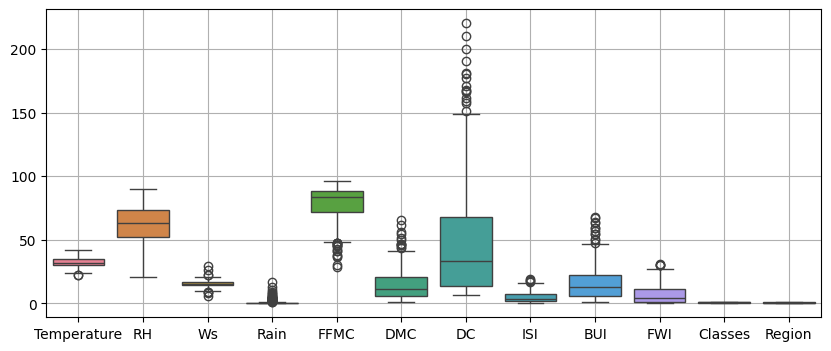

In [17]:
# Let us see some of the outliers (if exists) in our dataset
plt.figure(figsize = (10,4))
sns.boxplot(data = dataset) # Boxplot is the best to visualize outliers
plt.grid(True)
plt.show()

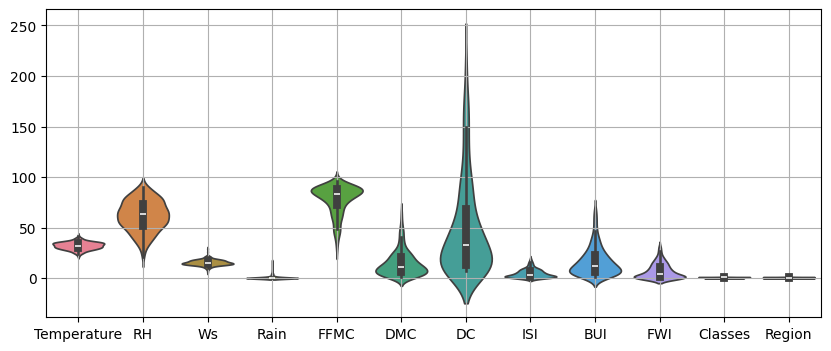

In [18]:
# But we can also visualize outliers with the help of violin plots
plt.figure(figsize = (10,4))
sns.violinplot(data = dataset)
plt.grid(True)
plt.show()

In [19]:
temp_data = pd.read_csv('merged-dataset.csv')
temp_data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


<Figure size 500x400 with 0 Axes>

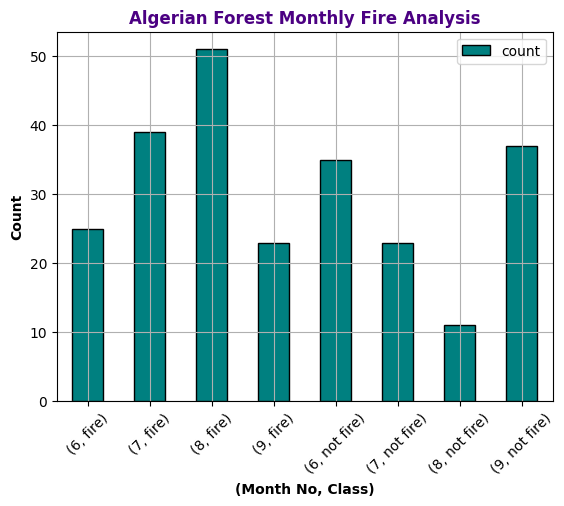

In [20]:
# Analyzing the monthly fire based on the dataset
monthly_fire_data = pd.DataFrame(temp_data.groupby('month')['Classes'].value_counts())
monthly_fire_data = monthly_fire_data.sort_values(by='Classes') # This sorts a dataframe based on values. 'by' field tells which attribute to consider as the sorting paramter
plt.figure(figsize = (5,4))
monthly_fire_data.plot(kind = 'bar', color = 'teal', edgecolor = 'black')
plt.legend()
plt.title('Algerian Forest Monthly Fire Analysis', weight = 'bold', color = 'indigo')
plt.xlabel('(Month No, Class)', weight = 'bold')
plt.ylabel('Count', weight = 'bold')
plt.xticks(rotation = 45)
plt.grid(True)

In [21]:
# After carefully observing the above graph, we can understand that:
# Algerian regions had the most number of forest fires in the month of July and August.
# It had the least forest fires in the month of September.

In [22]:
# Let us check the status of our dataset
dataset.head(5)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


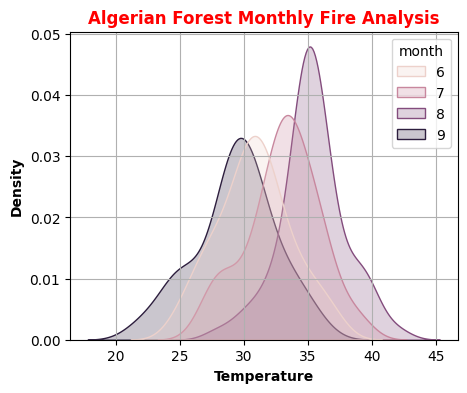

In [23]:
# Analyzing the monthly temperature based on the dataset
plt.figure(figsize = (5,4))
sns.kdeplot(x = 'Temperature', hue = 'month', data = temp_data, fill=True, color = 'red')
# hue = 'month' ensures we have a separate line for each month
plt.title('Algerian Forest Monthly Fire Analysis', weight = 'bold', color = 'red')
plt.xlabel('Temperature', weight = 'bold')
plt.ylabel('Density', weight = 'bold')
plt.grid(True)

##### Feature Selection

In [24]:
# First, we will be seperating the independent and the dependent features
X = dataset.drop(columns=['FWI'], axis = 1) # This means all the columns except the FWI
y = dataset.FWI # basically, dataset['FWI'], both this does the same thing
print(X.head())
print() # Just for an empty line
print(y.head())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9        0       0

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64


In [25]:
# Now, we have to do our train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(183, 11) (61, 11)


             Temperature        RH        Ws      Rain      FFMC       DMC  \
Temperature     1.000000 -0.664492 -0.249312 -0.375047  0.703238  0.485379   
RH             -0.664492  1.000000  0.235766  0.262550 -0.637201 -0.398168   
Ws             -0.249312  0.235766  1.000000  0.262759 -0.169489 -0.013533   
Rain           -0.375047  0.262550  0.262759  1.000000 -0.585018 -0.291338   
FFMC            0.703238 -0.637201 -0.169489 -0.585018  1.000000  0.602278   
DMC             0.485379 -0.398168 -0.013533 -0.291338  0.602278  1.000000   
DC              0.374673 -0.215075  0.073923 -0.296114  0.508348  0.877045   
ISI             0.607478 -0.691612  0.011260 -0.354277  0.745644  0.657983   
BUI             0.459776 -0.345860  0.023266 -0.301666  0.593647  0.982049   
Classes         0.512818 -0.429397 -0.078171 -0.394262  0.774398  0.580530   
Region          0.256099 -0.397053 -0.229797 -0.096985  0.237434  0.197489   

                   DC       ISI       BUI   Classes    Region  

<Axes: >

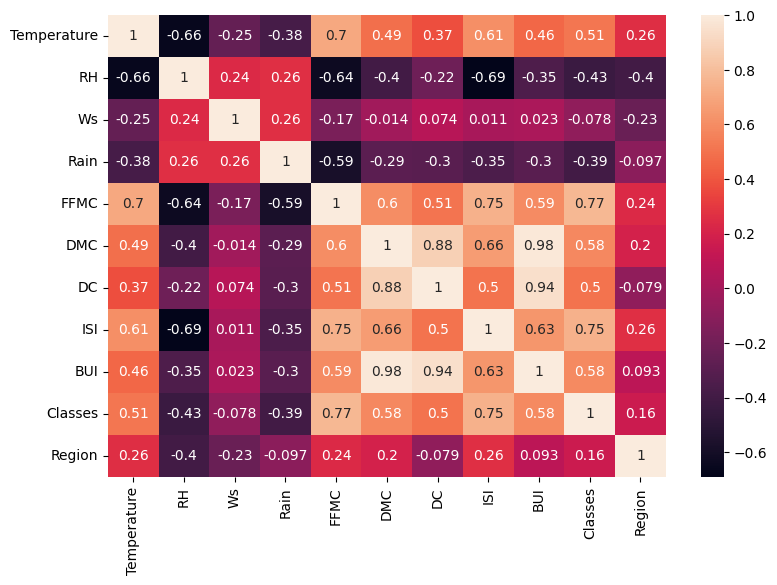

In [26]:
# Now, our next step is to perform 'Feature Selection' based on correlation (multicollinearity -> one independent feature must not be very much correlated with another independent feature). To remove those, we set some threshold values based on which we perform the removal and this threshold value is generally provided by a domain expert.
print(X_train.corr())
# Let us visualize this with the help of heatmap also
plt.figure(figsize=(9,6))
sns.heatmap(data = X_train.corr(), annot=True)

In [27]:
# Let's filter out those columns which are highly correlated with the other independent attributes or columns
def correlation(dataset: pd.DataFrame, threshold: float):
    cols_to_remove = set() # So that, we do not add duplicate features
    corr_matrix = dataset.corr()
    for row in range(0, len(corr_matrix.columns)):
        for col in range(row+1, len(corr_matrix.columns)): # avoid self-correlation and duplicates
            if abs(corr_matrix.iloc[row, col]) > threshold: # iloc is used for position based indexing in a pandas dataframe [i, j]
                cols_to_remove.add(corr_matrix.columns[col]) # The current col is highly correlated with the current row
    return cols_to_remove

# We loop through the upper triangle of the correlation matrix (row+1 to avoid duplicates). 'row' is the first feature in the pair, 'col' is the second feature. If correlation between two features is above the threshold: We keep the first feature ('row') and mark the second ('col') for removal. Why remove 'col' instead of 'row'?
# Prevents removing too many features
# Keeps the first occurrence of each correlated group
# Avoids re-checking already removed features

cols_to_remove = correlation(X_train, 0.85) # Considering 0.85 as the threshold value

# Now finally, we need to drop this features
X_train = X_train.drop(list(cols_to_remove), axis=1)
X_test = X_test.drop(list(cols_to_remove), axis=1)
X_train.shape, X_test.shape

((183, 9), (61, 9))

In [28]:
# Now we need to scale our features or what we call as standardizing our features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

[[-0.81085018  0.16311382  1.29231566 ... -0.77409606 -1.1098231
  -1.00547949]
 [ 1.06405791 -0.44884168  0.15167049 ...  0.84971776  0.9010445
   0.99455037]
 [-0.27516216  0.63907922 -0.60875963 ... -0.21666743  0.9010445
   0.99455037]
 ...
 [-1.88222624  0.91105944  0.53188555 ... -1.08916441 -1.1098231
  -1.00547949]
 [ 0.26052587 -0.38084663  0.15167049 ...  0.48617735  0.9010445
   0.99455037]
 [-0.54300617  0.9790545   2.05274578 ... -0.87104017 -1.1098231
  -1.00547949]]
[[-2.75162156e-01  9.51187672e-02 -2.28544571e-01 -3.81132246e-01
   6.38241722e-01 -4.01362602e-02  2.43817082e-01  9.01044498e-01
  -1.00547949e+00]
 [ 2.60525871e-01 -5.84831795e-01 -9.88974688e-01 -3.81132246e-01
   7.42136256e-01 -3.84555270e-01  4.13469272e-01  9.01044498e-01
  -1.00547949e+00]
 [ 2.60525871e-01 -9.92802132e-01  1.51670488e-01 -3.81132246e-01
   7.00578442e-01 -5.44750158e-01  5.10413381e-01  9.01044498e-01
   9.94550368e-01]
 [ 7.96213899e-01 -6.52826851e-01  5.31885546e-01 -1.47707879

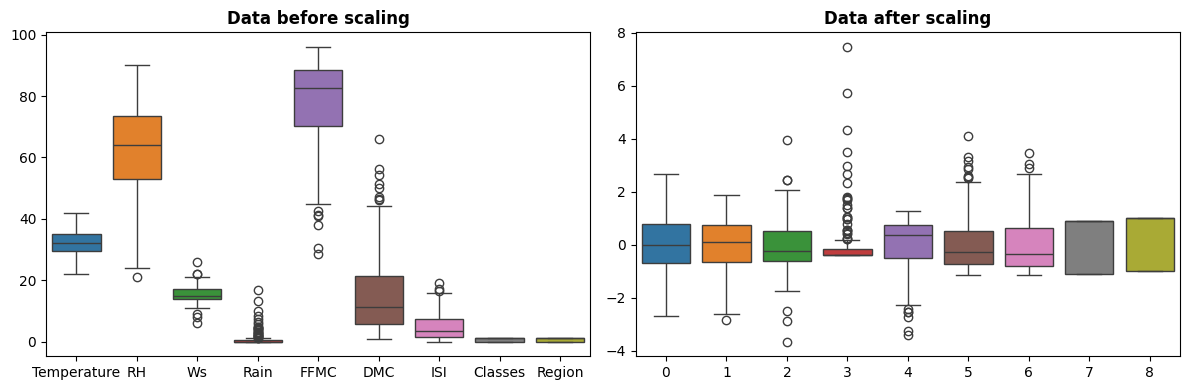

In [29]:
# Let us now draw a boxplot to understand the effect of standard scaler on the dataset
plt.figure(figsize=(12,4))

# Data before scaling
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('Data before scaling', weight = 'bold')

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('Data after scaling', weight = 'bold')

plt.tight_layout()

##### Model Training

MSE: 0.5604072092821962
MAE: 0.5516452785962688
R2 Score: 0.990325441548238


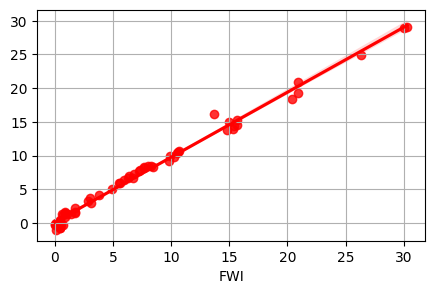

In [30]:
# Let's start with Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_regression = LinearRegression(fit_intercept=True, n_jobs=-1)

lin_regression = lin_regression.fit(X_train_scaled, y_train)
y_pred_lin = lin_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_lin)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_lin)
r2_lin = r2_score(y_true = y_test, y_pred = y_pred_lin)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_lin}')

# Lets see, the regression plot of y_test and y_pred_lin (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_lin, color = 'red') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

MSE: 2.7388108602883756
MAE: 1.186250860950974
R2 Score: 0.9527186921986258


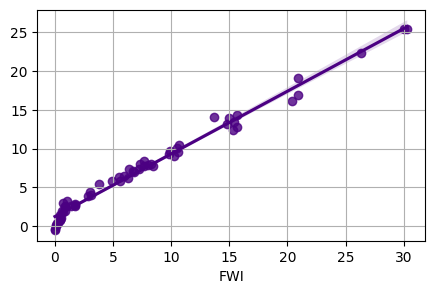

In [31]:
# Now we will implement the advanced regression concepts like Lasso, Ridge and Elasticnet

# Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lasso_regression = Lasso(fit_intercept=True)

lasso_regression = lasso_regression.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_lasso)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_lasso)
r2_lasso = r2_score(y_true = y_test, y_pred = y_pred_lasso)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_lasso}')

# Lets see, the regression plot of y_test and y_pred_lasso (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_lasso, color = 'indigo') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

MSE: 0.6024533295523127
MAE: 0.5902255506705573
R2 Score: 0.989599580707254
Alpha values: [6.70445658 6.25259865 5.83119443 5.43819144 5.07167554 4.72986158
 4.41108474 4.11379239 3.83653655 3.57796683 3.33682384 3.11193308
 2.90219921 2.70660069 2.52418487 2.35406325 2.19540727 2.04744417
 1.90945328 1.78076252 1.66074509 1.54881643 1.44443138 1.34708154
 1.25629276 1.17162283 1.09265937 1.01901779 0.9503394  0.8862897
 0.82655674 0.77084959 0.7188969  0.67044566 0.62525986 0.58311944
 0.54381914 0.50716755 0.47298616 0.44110847 0.41137924 0.38365366
 0.35779668 0.33368238 0.31119331 0.29021992 0.27066007 0.25241849
 0.23540633 0.21954073 0.20474442 0.19094533 0.17807625 0.16607451
 0.15488164 0.14444314 0.13470815 0.12562928 0.11716228 0.10926594
 0.10190178 0.09503394 0.08862897 0.08265567 0.07708496 0.07188969
 0.06704457 0.06252599 0.05831194 0.05438191 0.05071676 0.04729862
 0.04411085 0.04113792 0.03836537 0.03577967 0.03336824 0.03111933
 0.02902199 0.02706601 0.02524185 0.0235

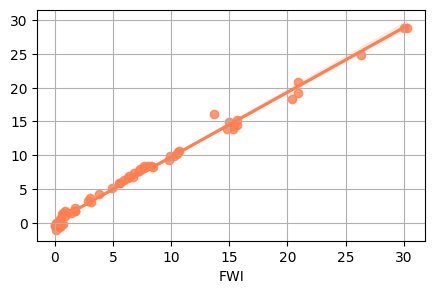

In [32]:
# Now, if we want to use the Lasso Regression with Cross Validation (Its a type of Hyperparameter Tuning)
# This is also referred to as 'Cross Validation Lasso'
from sklearn.linear_model import LassoCV
lassocv_regression = LassoCV(fit_intercept=True, n_jobs=-1, cv = 5) # cv is the number of cross-validation folds
# By default, it works on 100 alphas and selects the best one

lassocv_regression = lassocv_regression.fit(X_train_scaled, y_train)
y_pred_lassocv = lassocv_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_lassocv)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_lassocv)
r2_lasso_cv = r2_score(y_true = y_test, y_pred = y_pred_lassocv)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_lasso_cv}')

# Attributes
# Now, if we want to check, what alpha values that it worked on and what value that got the best results and got selected
print('Alpha values:', lassocv_regression.alphas_)
print('Chosen alpha:', lassocv_regression.alpha_) # The alpha value which was selected

# If we want to check the mean squared error for each path (for each alpha value)
print('MSE Path:', lassocv_regression.mse_path_)

# Lets see, the regression plot of y_test and y_pred_lassocv (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_lassocv, color = 'coral') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

MSE: 0.5994739929606658
MAE: 0.577955442841222
R2 Score: 0.9896510143175393


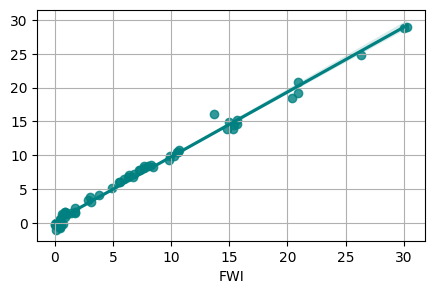

In [33]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

ridge_regression = Ridge(fit_intercept=True)

ridge_regression = ridge_regression.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_ridge)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_ridge)
r2_ridge = r2_score(y_true = y_test, y_pred = y_pred_ridge)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_ridge}')

# Lets see, the regression plot of y_test and y_pred_ridge (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_ridge, color = 'teal') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

MSE: 0.5994739929606658
MAE: 0.577955442841222
R2 Score: 0.9896510143175393
Alpha value: 1.0
{'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': None, 'store_cv_values': 'deprecated'}


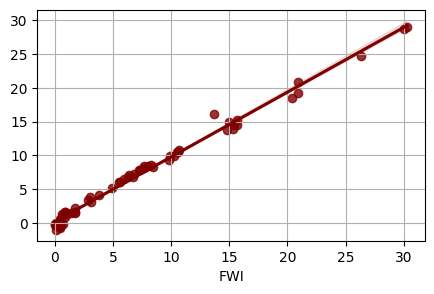

In [34]:
# Similarly, we have Ridge Regression Cross Validation also (RidgeCV)
from sklearn.linear_model import RidgeCV # By default, RidgeCV performs Leave-One-Out-Cross-Validation (LOOCV) if we do not provide any cv
ridgecv_regression = RidgeCV(fit_intercept=True, cv = 5) # cv is the number of cross-validation folds

ridgecv_regression = ridgecv_regression.fit(X_train_scaled, y_train)
y_pred_ridgecv = ridgecv_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_ridgecv)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_ridgecv)
r2_ridge_cv = r2_score(y_true = y_test, y_pred = y_pred_ridgecv)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_ridge_cv}')

# Attributes
print('Alpha value:', ridgecv_regression.alpha_) # It takes values in range 0.0,1.0 and tries for 10 values

# One more interesting thing, if we want to check what parameters we actually passed to RidgeCV, we can write
print(ridgecv_regression.get_params()) # This will show all the parameters we passed

# Lets see, the regression plot of y_test and y_pred_ridgecv (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_ridgecv, color = 'maroon') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

MSE: 7.086715440207195
MAE: 1.9100570629061815
R2 Score: 0.8776588851433474


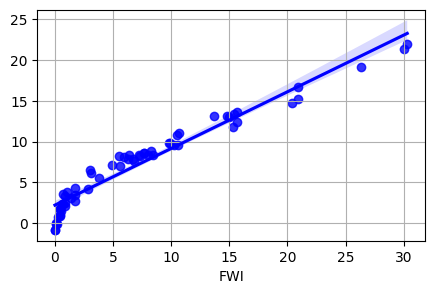

In [35]:
# Elasticnet Regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

elasticnet_regression = ElasticNet(fit_intercept=True)

elasticnet_regression = elasticnet_regression.fit(X_train_scaled, y_train)
y_pred_elasticnet = elasticnet_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_elasticnet)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_elasticnet)
r2_elasticnet = r2_score(y_true = y_test, y_pred = y_pred_elasticnet)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_elasticnet}')

# Lets see, the regression plot of y_test and y_pred_elasticnet (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_elasticnet, color = 'blue') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

MSE: 0.6469933385440643
MAE: 0.6148342313483072
R2 Score: 0.9888306667580836
Alpha values: [13.40891317 12.5051973  11.66238885 10.87638288 10.14335107  9.45972316
  8.82216948  8.22758478  7.67307311  7.15593366  6.67364768  6.22386616
  5.80439841  5.41320139  5.04836973  4.70812651  4.39081454  4.09488833
  3.81890657  3.56152504  3.32149018  3.09763286  2.88886277  2.69416309
  2.51258551  2.34324566  2.18531874  2.03803557  1.9006788   1.77257941
  1.65311349  1.54169917  1.43779381  1.34089132  1.25051973  1.16623889
  1.08763829  1.01433511  0.94597232  0.88221695  0.82275848  0.76730731
  0.71559337  0.66736477  0.62238662  0.58043984  0.54132014  0.50483697
  0.47081265  0.43908145  0.40948883  0.38189066  0.3561525   0.33214902
  0.30976329  0.28888628  0.26941631  0.25125855  0.23432457  0.21853187
  0.20380356  0.19006788  0.17725794  0.16531135  0.15416992  0.14377938
  0.13408913  0.12505197  0.11662389  0.10876383  0.10143351  0.09459723
  0.08822169  0.08227585  0.07673

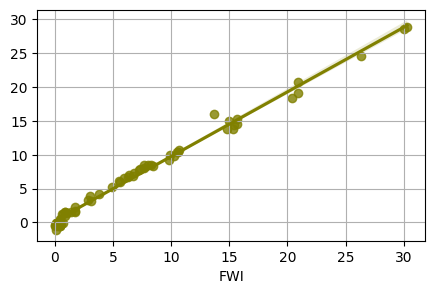

In [36]:
# Finally, we have Elasticnet Regression Cross Validation also (ElasticNetCV)
from sklearn.linear_model import ElasticNetCV
elasticnetcv_regression = ElasticNetCV(fit_intercept=True, cv = 5) # By default, it works on 100 alphas and selects the best one

elasticnetcv_regression = elasticnetcv_regression.fit(X_train_scaled, y_train)
y_pred_elasticnetcv = elasticnetcv_regression.predict(X_test_scaled)

mse = mean_squared_error(y_true = y_test, y_pred = y_pred_elasticnetcv)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred_elasticnetcv)
r2_elasticnet_cv = r2_score(y_true = y_test, y_pred = y_pred_elasticnetcv)
print(f'MSE: {mse}\nMAE: {mae}\nR2 Score: {r2_elasticnet_cv}')

# Attributes
print('Alpha values:', elasticnetcv_regression.alphas_)
print('Alpha values:', elasticnetcv_regression.alpha_) # Alpha that got selected
print('MSE Path:', elasticnetcv_regression.mse_path_)

# Lets see, the regression plot of y_test and y_pred_elasticnetcv (if they follow a linear pattern, then our model is well trained)
plt.figure(figsize=(5,3))
sns.regplot(x = y_test, y = y_pred_elasticnetcv, color = 'olive') # And we obtained a linear pattern. Hence our model is well trained
plt.grid(True)

In [37]:
# Now let us predict for some new values
print(X_test.columns)

print('Minimum predicted FWI:', y_pred_elasticnetcv.min())
print('Maximum predicted FWI:', y_pred_elasticnetcv.max())

new_data = pd.DataFrame(
    [[31, 72, 14, 7.24, 61.72, 46.6, 12.19, 0, 1]],
    columns=X_test.columns)

new_data_scaled = scaler.transform(new_data)
y_new_pred = elasticnetcv_regression.predict(new_data_scaled)
print('Current Predicted FWI:', y_new_pred[0].round(4)) # This is in range, so our prediction may be correct. After searching in Google, we found out that higher the FWI, higher is the risk of forest fire. So a FWI of 23.69 is of high fire risk based on given conditions.

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')
Minimum predicted FWI: -1.144821904041538
Maximum predicted FWI: 28.836143788998783
Current Predicted FWI: 23.6982


In [39]:
# Now we will consider only the model which is giving us the best accuracy and efficiency and then pickle it
best_efficiency = [
    [lasso_regression, r2_lasso, 'Lasso Regression'],
    [lassocv_regression, r2_lasso_cv, 'Lasso CV Regression'],
    [ridge_regression, r2_ridge, 'Ridge Regression'],
    [ridgecv_regression, r2_ridge_cv, 'Ridge CV Regression'],
    [elasticnet_regression, r2_elasticnet, 'Elasticnet Regression'],
    [elasticnetcv_regression, r2_elasticnet_cv, 'ElasticNetCV Regression']
]

best_model_efficiency = max(model[1] for model in best_efficiency)
model = [eff for eff in best_efficiency if eff[1] == best_model_efficiency][0]
model
print(f'{model[2]} has the best efficiency of {round(best_model_efficiency * 100, 4)}%')

Ridge Regression has the best efficiency of 98.9651%


In [40]:
# Pickling the machime learning model and the standard scaler
import pickle

with open('../models/scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('../models/proj1_model.pkl', 'wb') as file:
    pickle.dump(model[0], file)

In [ ]:
# Now let us load the model and do some predictions
with open('../models/proj1_model.pkl', 'rb') as file:
    model:Ridge = pickle.load(file)

with open('../models/scaler.pkl', 'rb') as file:
    pkl_scaler:StandardScaler = pickle.load(file)

new_data = pd.DataFrame(
    [[33, 69, 12, 6.56, 62.72, 39.6, 13.19, 0, 1]],
    columns=X_test.columns)
    
new_data_scaled = pkl_scaler.transform(new_data)

y_new_pred = model.predict(new_data_scaled)
print('Predicted FWI (Fire Weather Index):', y_new_pred[0].round(4))

Predicted FWI (Fire Weather Index): 22.8454
